In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import string


#since this is the first time using stopwords let'S download it
#nltk.download('stopwords')

#defining stop words
stops = set(stopwords.words('english'))

In [2]:
movie = pd.read_csv("movie.csv")
movie.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
#check the length of the dataset and the size of the last dimension
len(movie), movie.index.shape[-1]

(50000, 50000)

In [4]:
#check the shape of the dataset
print(f'The shape of the dataset is:{movie.shape}')

The shape of the dataset is:(50000, 2)


In [5]:
#Let's check the number of positive and negative reviews

positive_review = movie[movie['sentiment'] == 'positive']
print(f'We have {len(positive_review)} good reviews. \n The first ten are: \n{positive_review[:10]}\n\n')
negative_review = movie[movie['sentiment'] == 'negative']
print(f'We have {len(negative_review)} bad reviews.\n The first 10 are: {negative_review[:10]}')



We have 25000 good reviews. 
 The first ten are: 
                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
9   If you like original gut wrenching laughter yo...  positive
14  This a fantastic movie of three prisoners who ...  positive
16  Some films just simply should not be remade. T...  positive
18  I remember this film,it was the first film i h...  positive


We have 25000 bad reviews.
 The first 10 are:                                                review sentiment
3   Basically there's a family where a little boy ...  negative
7   This show was an amazing, fresh & innovative i...  negative
8   En

C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


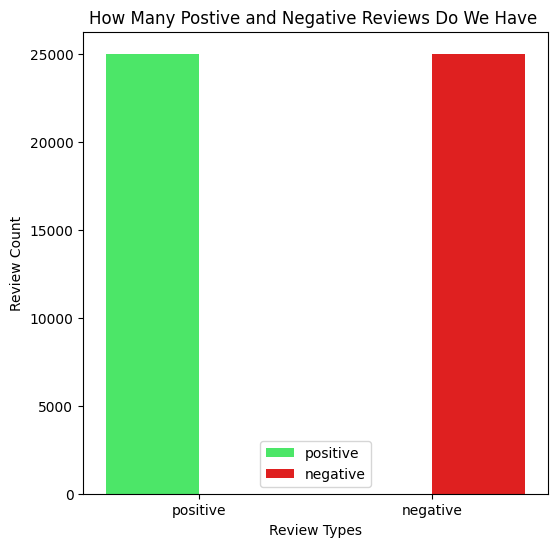

In [6]:
#Visualizing the number of negative and positive review using seaborn

plt.figure(figsize=(6,6))
unique_categories = set(movie['sentiment'])

palette = {'positive':'#33FF57', 'negative':'#FF0000'}
sns.countplot(x="sentiment", hue="sentiment", data=movie, palette= palette, dodge=True)

plt.legend(unique_categories)
plt.title('How Many Postive and Negative Reviews Do We Have ')
plt.xlabel('Review Types')
plt.ylabel('Review Count')
plt.show()




In [7]:
positive_review_word = [review for review in positive_review['review']]
negative_review_word = [review for review in negative_review['review']]

#positive_review_words

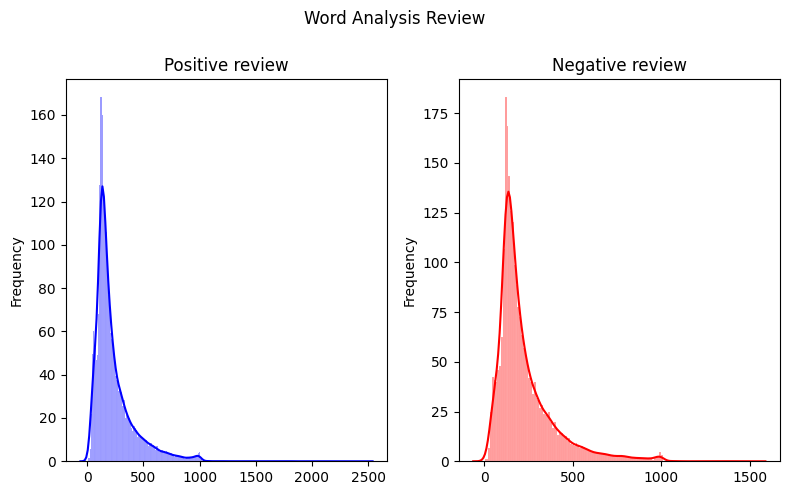

In [8]:
# Tokenize sentences and count words
positive_review_words = [len(review.split()) for review in positive_review['review']]
negative_review_words = [len(review.split()) for review in negative_review['review']]

def positive_negative_counts(positive_count, negative_count,titlee,  positive_label, negative_label):
    # print the two plots sidebyside using subplot
    fig, axs = plt.subplots(1, 2, figsize=(8, 5))
    
    sns.histplot(positive_count, kde=True, stat='frequency', kde_kws=dict(cut=3), color='blue', alpha=.4, edgecolor=(1, 1, 1, .4), ax=axs[0])
    axs[0].set_title(positive_label)
    
    sns.histplot(negative_count, kde=True, stat='frequency', kde_kws=dict(cut=3), color='red', alpha=.4, edgecolor=(1, 1, 1, .4),ax=axs[1])
    axs[1].set_title(negative_label)
    
    plt.tight_layout()
    fig.suptitle(titlee)
    plt.show()

positive_negative_counts(positive_review_words, negative_review_words,"Word Analysis Review",  "\n\nPositive review", "Negative review")

In [9]:
#define a code for counting punctuation and stopwords. For later purpose we can reuse it

def count_punctuation(text):
    punctuations = string.punctuation
    punctuation_count = np.mean(sum(1 for char in text if char in punctuations))
    return punctuation_count


def count_stopwords(text):
    stop_words = stops
    words = str(text).split()
    stopword_count = np.mean(sum(1 for word in words if word.lower() in stop_words))
    return stopword_count


In [10]:
positive_punctuation = [count_punctuation(review) for review in positive_review['review']]
negative_punctuation = [count_punctuation(review) for review in negative_review['review']]

positive_stopwords = [count_stopwords(review) for review in positive_review['review']]
negative_stopwords = [count_stopwords(review) for review in negative_review['review']]




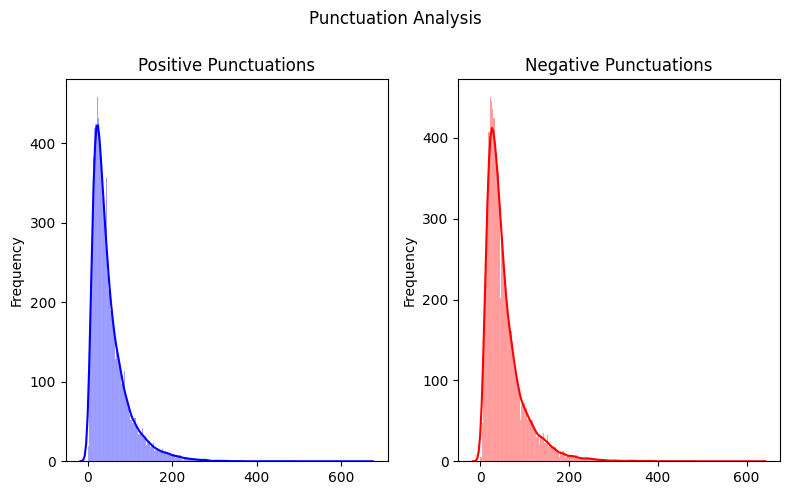

In [11]:
positive_negative_counts(positive_punctuation, negative_punctuation,"Punctuation Analysis",  "\n\nPositive Punctuations", "Negative Punctuations")

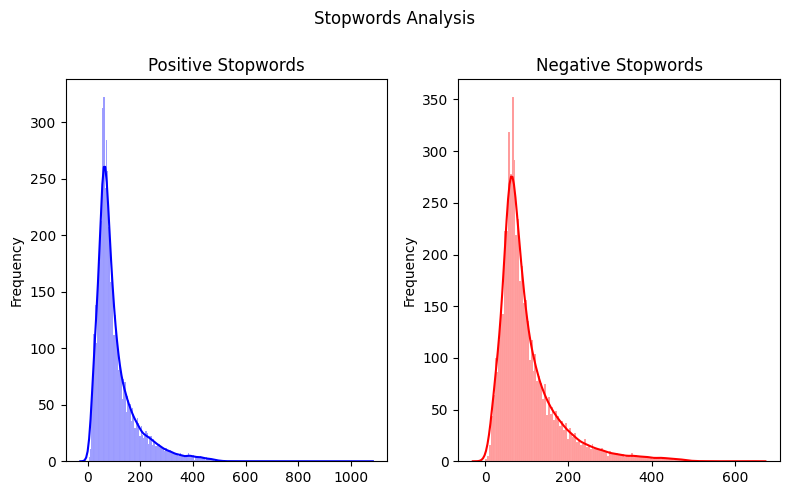

In [12]:

positive_negative_counts(positive_stopwords, negative_stopwords,"Stopwords Analysis",  "\n\nPositive Stopwords", "Negative Stopwords")


In [13]:
def count_urls(text):
    
    url_count = np.mean(sum(1 for word in str(text).lower().split() if 'http' in word or 'https' in word))
    return url_count
    
positive_urls = [count_urls(review) for review in positive_review['review']]
negative_urls = [count_urls(review) for review in negative_review['review']]    

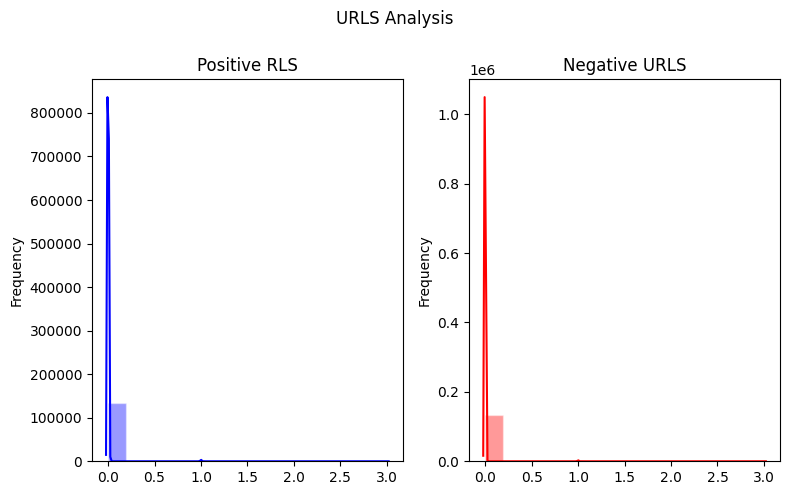

In [14]:
positive_negative_counts(positive_urls, negative_urls,"URLS Analysis",  "\n\nPositive RLS", "Negative URLS")


In [15]:
#WordCloud Visualizations
from wordcloud import WordCloud
from PIL import Image

def wordclouds_visuals(positive_reviews, negative_reviews):
    #join all positive and negative together
   positive_text =  " ".join(review for review in positive_reviews)
   negative_text =  " ".join(review for review in negative_reviews)

    #creating the word clouds
   wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)
   wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

   #plot the word cloud using matplotlb
   fig, axs = plt.subplots(1,2, figsize=(16,8))
   axs[0].imshow(wordcloud_positive, interpolation='bilinear', cmap= 'viridis')
   axs[0].set_title('Postive Review Word Cloud')
   
   axs[0].axis('off')

   axs[1].imshow(wordcloud_negative, interpolation='bilinear', cmap= 'plasma')
   axs[1].set_title('Negative Review Word Cloud')
   axs[1].axis('off')

   plt.tight_layout()
   plt.show()



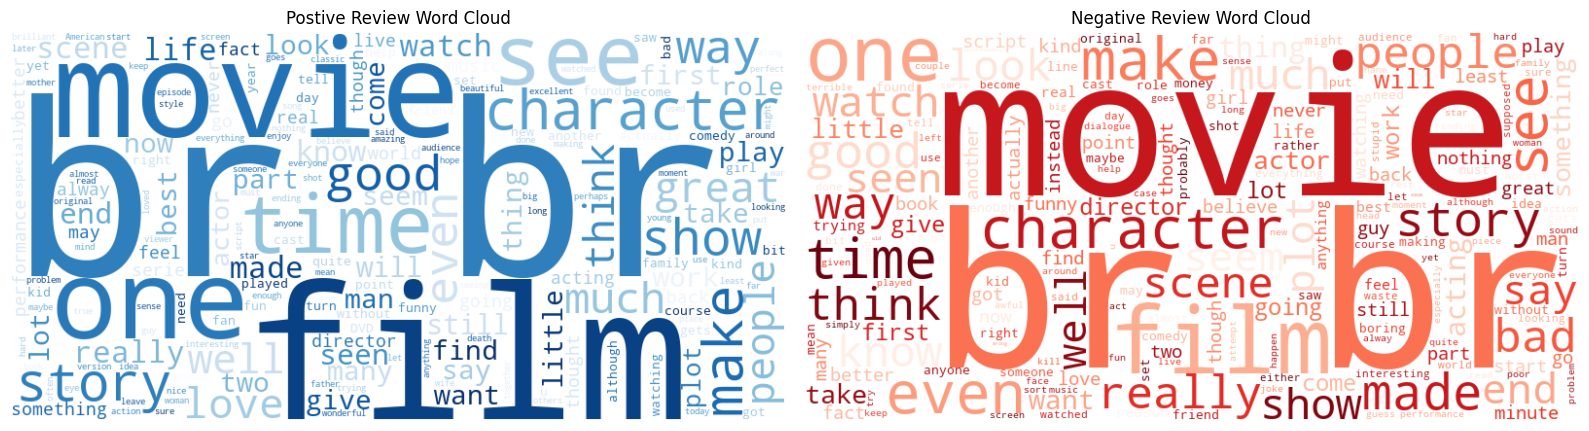

In [16]:
wordclouds_visuals(positive_review_word, negative_review_word)


In [17]:
#count the corpus
from collections import Counter

def create_corpus(word):
   return[item for sublist in movie[movie['sentiment'] == word]['review'].str.split() for item in sublist]


def plot_corpus():
    counter= Counter(corpus)
    most_common_words = counter.most_common(100)
    
    filtered_words = [(word, count) for word,count in most_common_words if word not in stops]
    x,y = zip(*filtered_words)
    
    sns.barplot(x=y, y=x)
    
       


    

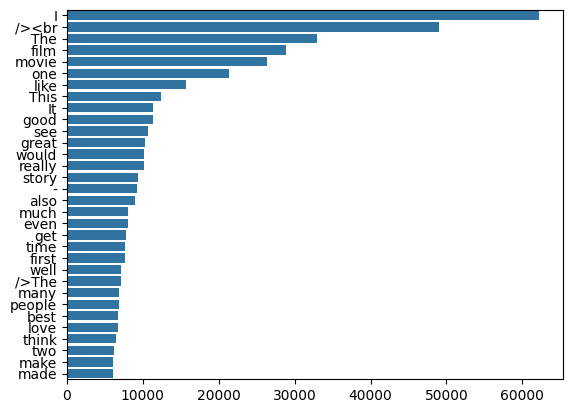

In [18]:
#plot the positive corpus
corpus = create_corpus('positive')
plot_corpus()



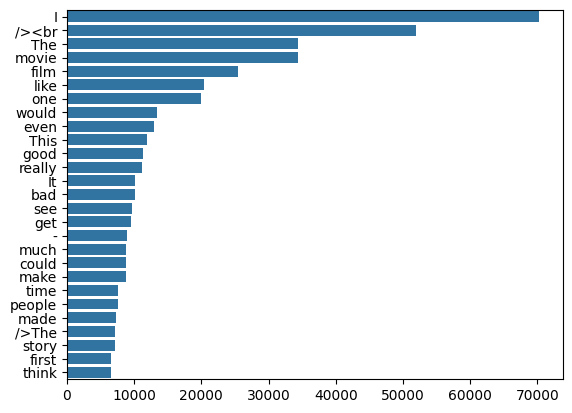

In [19]:
#plot the negative corpus

corpus = create_corpus('negative')
plot_corpus()


#Analytical Observation from the Dataset

1) The reviews(positive and negative) are equally distributed
2) It includes redundant words and HTML syntax
3) Punctuation and stopwords are uniformly distributed across the dataset
   


Let's apply the Gram statistic (usually we have uni-gram, bi-gram and tri-gram). This analysis is helpful in understand the frequency, probability of an n-gram occuring in a specific context, and how much an n-gram will help us in predicting sebsequent elements.

Let's Clean the data! 

As seen above we have some noise in the data such as:
1) punctuations
2) Html
3) Urls
4) emojis
5) stopwords
6) Also, we will have to replace abbreviations incase we have such in the data


In [45]:
#Import libraries
import re
from bs4 import BeautifulSoup

#Let's create abbreviation dictionary

abbreviations ={
    "you've" : "you have",
    "there's" : "there is",
    "We've" : "We have",
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "brb": "be right back",
    "omg": "oh my god",
    "lol": "laugh out loud",
    "haven't" : "have not",
    "He's" : "He is",
    "She's" : "She is"
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
#     "" : "",
 }




In [46]:
#let's create fnctions

def remove_html(text):
    return re.sub(r"https://\S+|www\.\S+", '', text,flags=re.MULTILINE)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))   

def remove_emojis(text):
    emoji_pattern = re.compile(
         "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stops]
    return ' '.join(filtered_tokens)

def expand_abbreviations(text):
    tokens = text.split()
    expanded_tokens = [abbreviations[word.lower()] if word.lower() in abbreviations else word for word in tokens]
    return ' '.join(expanded_tokens)


def preprocess_text(text):
    text = remove_html(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_emojis(text)
    text = expand_abbreviations(text)
    text = remove_stopwords(text)
    return text
    

In [47]:
cleaned_corpus = [preprocess_text(sentence) for sentence in positive_review['review']]

cleaned_corpus[:10]


['One reviewers mentioned watching 1 Oz episode youll hooked right exactly happened mebr br first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr br called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr br would say main appeal show due fact goes shows wouldnt dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well manner

In [48]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


In [49]:

# Gram analysis bi-gram and tri-gram
import plotly.graph_objs as go
from plotly import tools
from collections import defaultdict
from plotly.subplots import make_subplots


def preprocess_text(text):
    tokens = [token.lower() for token in text.split() if token.lower() not in stops and token.isalpha()]
    return tokens

def generate_ngrams(tokens,n):
    ngrams = zip(*[tokens[i:]for i in range(n)])
    return[" " .join(ngram) for ngram in ngrams]
          
def create_ngram_frequency_dict(data, n, limit=None):
    freq_dict = defaultdict(int)
    for sentence in data:
        tokens = preprocess_text(sentence)
        ngrams = generate_ngrams(tokens,n)

        
        for ngram in ngrams:
            freq_dict[ngram] += 1

    sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
    return dict(list(sorted_freq_dict.items())[:limit])

def create_horizontal_bar_chart(freq_dict, color='orange'):
    trace = go.Bar(
          y=list(freq_dict.keys())[::-1],
        x=list(freq_dict.values())[::-1],
        orientation='h',
        marker=dict(color=color),
    )
    return trace


def plot_ngrams(freq_dict_positive, freq_dict_negative, ngram_type):
    trace_positive = create_horizontal_bar_chart(freq_dict_positive)
    trace_negative = create_horizontal_bar_chart(freq_dict_negative)
     
    fig = make_subplots(rows=1, cols=2, vertical_spacing=0.1, subplot_titles=["Frequent {} in Positive Reviews".format(ngram_type),
                                                        "Frequent {} in Negative Reviews".format(ngram_type)])
    
    fig.add_trace(trace_positive, row=1, col=1)
    fig.add_trace(trace_negative, row=1, col=2)
    
    fig.update_layout(height=600, width=900, title_text="{} Analysis".format(ngram_type),
                      showlegend=False, plot_bgcolor='rgb(243, 243, 243)')
    
    fig.show()





make the gram statistic to plot the cleaned data and 

Bi-gram analysis


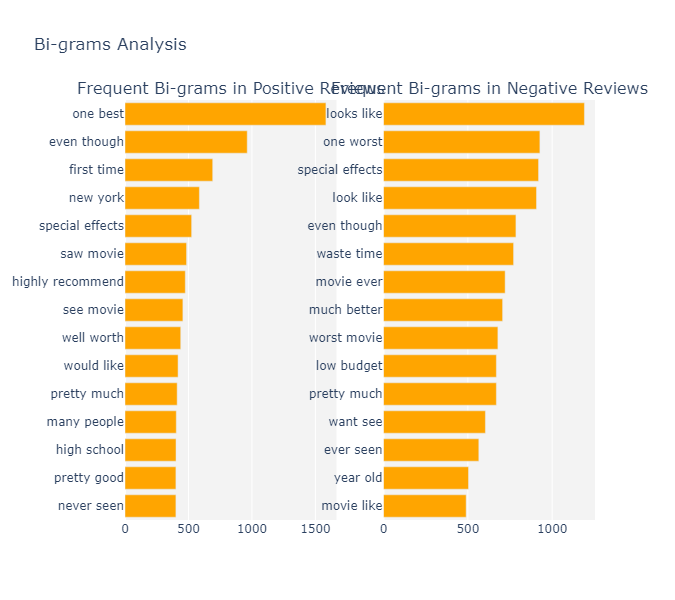

Tri-gram analysis


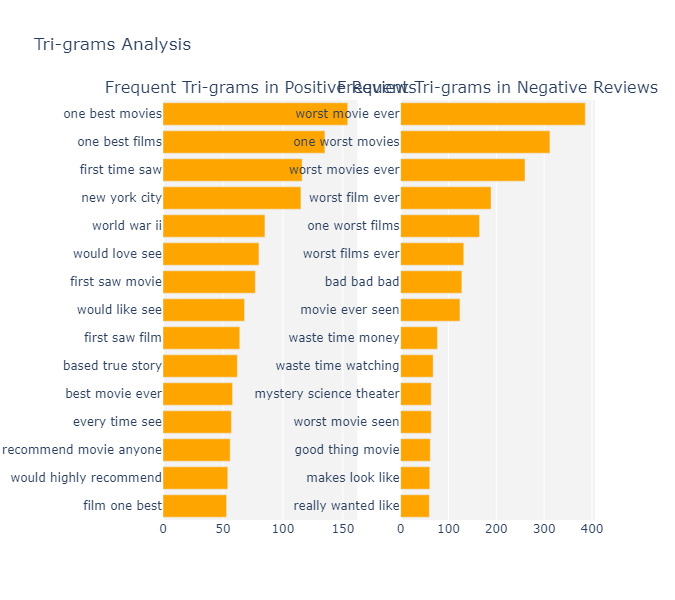

In [50]:
positive_review_words = cleaned_corpus


bi_gram_limit = 15
tri_gram_limit = 15
penta_gram_limit = 15


# Bi-gram analysis
print("Bi-gram analysis")
freq_positive_reviews_bi = create_ngram_frequency_dict(positive_review_word, 2, limit=bi_gram_limit)
freq_negative_reviews_bi = create_ngram_frequency_dict(negative_review_word, 2, limit=bi_gram_limit)
plot_ngrams(freq_positive_reviews_bi, freq_negative_reviews_bi, "Bi-grams")

# Tri-gram analysis
print("Tri-gram analysis")
freq_positive_reviews_tri = create_ngram_frequency_dict(positive_review_word, 3, limit=tri_gram_limit)
freq_negative_reviews_tri = create_ngram_frequency_dict(negative_review_word, 3, limit=tri_gram_limit)
plot_ngrams(freq_positive_reviews_tri, freq_negative_reviews_tri, "Tri-grams")

In [26]:
# # penta-gram analysis
# print("Penta-gram analysis")
# freq_positive_reviews_penta = create_ngram_frequency_dict(positive_review_word, 5, limit=penta_gram_limit)
# freq_negative_reviews_penta = create_ngram_frequency_dict(negative_review_word, 5, limit=penta_gram_limit)
# plot_ngrams(freq_positive_reviews_penta, freq_negative_reviews_penta, "Penta-grams")

Analytical Insight

For the gram analysis we did the bi-gram and tri-gram analysis to visualize the most frequent occured words and the number of occurances of 15 n-gram.